In [1]:
import jax
import jax.numpy as jnp
import optax
from jax import random

X = jnp.load('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/FIN 553/Project/1/X.npy')
y = jnp.load('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/FIN 553/Project/1/y.npy')

# Normalize features
@jax.jit
def normalize_features(X):
    mean = jnp.mean(X, axis=0)
    std = jnp.std(X, axis=0)
    return (X - mean) / (std + 1e-8)

X_normalized = normalize_features(X)

# Linear model
@jax.jit
def linear_model(params, X):
    return jnp.dot(X, params)

# Loss function with L2 regularization
@jax.jit
def loss_fn(params, X, y, reg_lambda=0.01):
    predictions = linear_model(params, X)
    mse = jnp.mean((predictions - y) ** 2)
    l2_reg = reg_lambda * jnp.sum(params ** 2)
    return mse + l2_reg

# Initialize parameters
def init_params(key, input_dim):
    return random.normal(key, (input_dim,)) * 0.01

# Training step
@jax.jit
def train_step(params, opt_state, X, y):
    loss, grads = jax.value_and_grad(loss_fn)(params, X, y)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss

# Split the dataset
train_idx = int(0.8 * len(X))
val_idx = int(0.9 * len(X))

X_train, X_val, X_test = X_normalized[:train_idx], X_normalized[train_idx:val_idx], X_normalized[val_idx:]
y_train, y_val, y_test = y[:train_idx], y[train_idx:val_idx], y[val_idx:]

# Hyperparameters
learning_rate = 0.015
n_epochs = 20000
reg_lambda = 0.07

# Initialize parameters and optimizer with learning rate decay
key = random.PRNGKey(0)
params = init_params(key, X.shape[1])
optimizer = optax.adam(learning_rate=optax.exponential_decay(
    init_value=learning_rate, transition_steps=1000, decay_rate=0.9))
opt_state = optimizer.init(params)

# Train the model
best_val_mse = float('inf')
best_params = None

for epoch in range(n_epochs):
    params, opt_state, loss = train_step(params, opt_state, X_train, y_train)

    if epoch % 1000 == 0:
        val_predictions = linear_model(params, X_val)
        val_mse = jnp.mean((val_predictions - y_val) ** 2)
        if val_mse < best_val_mse:
            best_val_mse = val_mse
            best_params = params

        print(f"Epoch {epoch}, Training Loss: {loss}, Validation MSE: {val_mse}")

# Evaluate the final model on the test set
test_predictions = linear_model(best_params, X_test)
test_mse = jnp.mean((test_predictions - y_test) ** 2)

print(f"Best validation MSE: {best_val_mse}")
print(f"Final test MSE: {test_mse}")


Epoch 0, Training Loss: 3.235414981842041, Validation MSE: 814.8558959960938
Epoch 1000, Training Loss: 0.08288675546646118, Validation MSE: 0.03122924268245697
Epoch 2000, Training Loss: 0.07951952517032623, Validation MSE: 0.01991828717291355
Epoch 3000, Training Loss: 0.07899393141269684, Validation MSE: 0.018624568358063698
Epoch 4000, Training Loss: 0.07953089475631714, Validation MSE: 0.019863629713654518
Epoch 5000, Training Loss: 0.07850614935159683, Validation MSE: 0.018424203619360924
Epoch 6000, Training Loss: 0.07837805896997452, Validation MSE: 0.01841336488723755
Epoch 7000, Training Loss: 0.49862468242645264, Validation MSE: 0.2494657188653946
Epoch 8000, Training Loss: 0.07823564112186432, Validation MSE: 0.018404947593808174
Epoch 9000, Training Loss: 0.07819755375385284, Validation MSE: 0.018403686583042145
Epoch 10000, Training Loss: 0.10724002867937088, Validation MSE: 0.06849758327007294
Epoch 11000, Training Loss: 0.0781545490026474, Validation MSE: 0.018401447683


Training with learning rate: 0.1
Epoch 0, Training Loss: 1975.7529
Epoch 100, Training Loss: 0.3832
Epoch 200, Training Loss: 0.1207
Epoch 300, Training Loss: 0.0629
Epoch 400, Training Loss: 0.0394
Epoch 500, Training Loss: 0.0276
Epoch 600, Training Loss: 0.0204
Epoch 700, Training Loss: 0.0158
Epoch 800, Training Loss: 0.0126
Epoch 900, Training Loss: 0.0104
Validation MSE: 0.0140

Training with learning rate: 0.5
Epoch 0, Training Loss: 1877.5938
Epoch 100, Training Loss: 0.1594
Epoch 200, Training Loss: 0.0585
Epoch 300, Training Loss: 0.0311
Epoch 400, Training Loss: 0.0196
Epoch 500, Training Loss: 0.0168
Epoch 600, Training Loss: 0.0125
Epoch 700, Training Loss: 0.0114
Epoch 800, Training Loss: 0.0106
Epoch 900, Training Loss: 0.0069
Validation MSE: 0.0111

Training with learning rate: 0.01
Epoch 0, Training Loss: 2093.7561
Epoch 100, Training Loss: 378.7698
Epoch 200, Training Loss: 82.0344
Epoch 300, Training Loss: 19.7195
Epoch 400, Training Loss: 5.1706
Epoch 500, Training

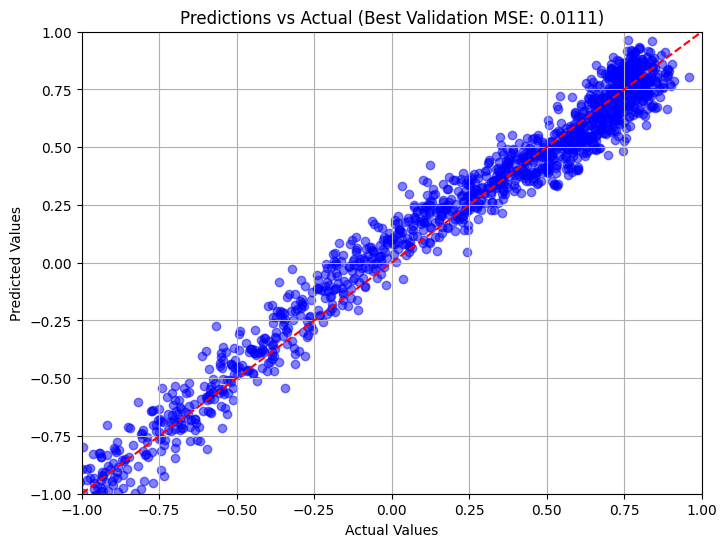

In [2]:
import jax.numpy as jnp
from jax import grad, jit
import optax
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

X = jnp.load('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/FIN 553/Project/1/X.npy')
y = jnp.load('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/FIN 553/Project/1/y.npy')

# Convert to JAX arrays
X = jnp.array(X)
y = jnp.array(y)

# Shuffle the data
np.random.seed(50)
indices = np.random.permutation(X.shape[0])
X_shuffled = X[indices]
y_shuffled = y[indices]

# Calculate split indices
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

# Split the data
X_train = X_shuffled[:train_size]
y_train = y_shuffled[:train_size]

X_val = X_shuffled[train_size:train_size + val_size]
y_val = y_shuffled[train_size:train_size + val_size]

X_test = X_shuffled[train_size + val_size:]
y_test = y_shuffled[train_size + val_size:]

# Mean Squared Error function
def mean_squared_error(weights, X, y):
    y_pred = jnp.dot(X, weights)
    return jnp.mean((y - y_pred) ** 2)

# List of learning rates to evaluate
learning_rates = [0.1, 0.5, 0.01, 0.05]
num_epochs = 1000

best_mse = float('inf')
best_lr = None
best_weights = None

# Loop through different learning rates
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")

    # Initialize weights using NumPy
    initial_weights = np.random.normal(size=(X_train.shape[1],))

    # Set up the optimizer
    optimizer = optax.adam(learning_rate=lr)
    opt_state = optimizer.init(initial_weights)

    # Training loop
    @jit
    def step(opt_state, weights, X, y):
        loss = mean_squared_error(weights, X, y)
        grads = grad(mean_squared_error)(weights, X, y)
        updates, opt_state = optimizer.update(grads, opt_state, weights)
        weights = optax.apply_updates(weights, updates)
        return weights, opt_state, loss

    weights = initial_weights

    for epoch in range(num_epochs):
        weights, opt_state, loss = step(opt_state, weights, X_train, y_train)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Training Loss: {loss:.4f}')

    # Evaluate the final MSE on validation set
    val_mse = mean_squared_error(weights, X_val, y_val)
    print(f'Validation MSE: {val_mse:.4f}')

    # Update best MSE and corresponding learning rate and weights
    if val_mse < best_mse:
        best_mse = val_mse
        best_lr = lr
        best_weights = weights

# Print the best results
print(f'\nBest Learning Rate: {best_lr}')
print(f'Best Validation MSE: {best_mse:.4f}')

# Evaluate performance on the test set using the best weights
test_mse = mean_squared_error(best_weights, X_test, y_test)
print(f'Test MSE using the best model: {test_mse:.4f}')

# Visualize Predictions vs Actual
y_pred = jnp.dot(X_test, best_weights)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-1, 1], [-1, 1], color='red', linestyle='--')  # Ideal line
plt.title(f'Predictions vs Actual (Best Validation MSE: {best_mse:.4f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.show()

In [3]:
import jax.numpy as jnp
import jax
import optax
import numpy as np

np.random.seed(100)


@jax.jit
def mse(y_true, y_predict):
    return jnp.mean((y_true - y_predict) ** 2)


@jax.jit
def dL(theta, X_tmp, y_tmp):
    def loss_fn(theta):
        y_predict = X_tmp @ theta
        return mse(y_tmp, y_predict)
    
    grad = jax.grad(loss_fn)(theta)
    
    return grad

def sample(X_tmp, y_tmp):
    N = len(X_tmp)
    batch_size = int(jnp.sqrt(N))
    idx = np.random.choice(N, batch_size)
    return X_tmp[idx], y_tmp[idx]

@jax.jit
def update_fn(theta, opt_state, X_tmp, y_tmp, alpha, beta, beta2):
    grad = dL(theta, X_tmp, y_tmp)
    optmizer = optax.adam(alpha, beta, beta2)
    updates, opt_state = optmizer.update(grad, opt_state)
    theta = optax.apply_updates(theta, updates)
    return theta, opt_state

def optimized_theta(X_train, y_train, X_val, y_val):
    n_model = 20 # Optimizing 20 different models at the same time
    max_iterations=50000
    theta = jnp.zeros(len(X_train[0]))
    alpha_list = [0.1, 0.05, 0.01, 1e-3, 1e-4, 1e-6]
    beta_list = [0.1, 0.2, 0.5, 0.9]
    beta2_list = [0.1, 0.2, 0.5, 0.9]
    alpha_vec = np.random.choice(alpha_list, n_model)
    beta_vec = np.random.choice(beta_list, n_model)
    beta2_vec = np.random.choice(beta2_list, n_model)
    hyperparams = dict({'alpha': alpha_vec, 'beta': beta_vec, 'beta2': beta2_vec})
    
    @jax.jit
    def stack(theta):
        return jnp.stack([theta] * n_model)
    
    optmizer = optax.adam(alpha_list[1], beta_vec[1], beta2_vec[1])
    opt_state = optmizer.init(theta)
    theta = stack(theta)
    opt_state = jax.tree.map(stack, opt_state)
    update = jax.jit(jax.vmap(update_fn, in_axes=(0, 0, None, None, 0, 0, 0)))
    
    
    for iteration in range(max_iterations+1):
        if iteration% 2000 ==0:
            print(f'Iterated {iteration} times')
        Xi, yi = sample(X_train, y_train)
        theta, opt_state = update(theta, opt_state, Xi, yi, alpha_vec, beta_vec, beta2_vec)

    # calculate all MSEs，find best theta
    mse_values = []
    for i in range(n_model):
        y_pred = X_val @ theta[i]
        mse_value = mse(y_val, y_pred)
        mse_values.append(mse_value)

    # choose Best MSE's theta
    index = jnp.argmin(jnp.array(mse_values))
    best_theta = theta[index]
    mse_values[index]
    print(f"Best model index: {index} \nBest training MSE: {mse(y_train, X_train @ best_theta)} \nBest validating MSE:{mse_values[index]}")
    
    return best_theta

def f(X):
    theta = optimized_theta(X_train, y_train, X_val, y_val)
    prediction = X @ theta
    np.save('theta.npy', theta)
    return prediction









if __name__ == "__main__":
    data = jnp.load('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/FIN 553/Project/1/X.npy') # loading features and targets
    y = jnp.load('/Users/iveshe/Library/Mobile Documents/com~apple~CloudDocs/Term 1/FIN 553/Project/1/y.npy')

    """
    Here is the step spliting the input data into three parts

    Training set: 60% of all the data
    Validating set: 20% of all the data
    Testing set: 20% of all the data

    """
    n = len(data)
    train_size = int(0.6 * len(data))
    val_size = int(0.2 * n)
    test_size = n - train_size - val_size

    indices = np.random.permutation(len(data))
    X_train = data[indices[:train_size]]
    X_val = data[indices[train_size:train_size + val_size]]
    X_test = data[indices[train_size + val_size:]]

    y_train = y[indices[:train_size]]
    y_val = y[indices[train_size:train_size + val_size]]
    y_test = y[indices[train_size + val_size:]]
    
    """
    Predicting step
    """
    prediction = f(X_test)
    print('Testing MSE: ',mse(prediction, y_test))

Iterated 0 times
Iterated 2000 times
Iterated 4000 times
Iterated 6000 times
Iterated 8000 times
Iterated 10000 times
Iterated 12000 times
Iterated 14000 times
Iterated 16000 times
Iterated 18000 times
Iterated 20000 times
Iterated 22000 times
Iterated 24000 times
Iterated 26000 times
Iterated 28000 times
Iterated 30000 times
Iterated 32000 times
Iterated 34000 times
Iterated 36000 times
Iterated 38000 times
Iterated 40000 times
Iterated 42000 times
Iterated 44000 times
Iterated 46000 times
Iterated 48000 times
Iterated 50000 times
Best model index: 3 
Best training MSE: 0.0157939326018095 
Best validating MSE:0.01847860962152481
Testing MSE:  0.018747747
